In [1]:
#Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn import metrics
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

In [2]:
#Reading the Data 

movie_df=pd.read_csv("/kaggle/input/imdb-5000-movie-dataset/movie_metadata.csv")

In [3]:
#Displaying the first 10 records

movie_df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
#Shape of the dataset (no of rows and no of columns)

movie_df.shape

(5043, 28)

In [5]:
#Displaying the data type of the dataset attributes 

movie_df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
#Five point summary for the numerical columns in the dataset

movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


# Dropping Unwanted Parameters
* gross:
* movie_imdb_link:
* ...

In [7]:
movie_df.drop(['gross','movie_imdb_link','color', 'movie_facebook_likes', 'actor_2_facebook_likes',
               'actor_1_facebook_likes', 'actor_3_facebook_likes', 'facenumber_in_poster', 'director_facebook_likes', 'language'], axis=1, inplace=True)
movie_df.head(5)

,director_name,num_critic_for_reviews,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,James Cameron,723.0,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,7.9,1.78
1,Gore Verbinski,302.0,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,7.1,2.35
2,Sam Mendes,602.0,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,6.8,2.35
3,Christopher Nolan,813.0,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,8.5,2.35
4,Doug Walker,NaN,NaN,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN


In [8]:
movie_df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'plot_keywords',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'imdb_score', 'aspect_ratio'],
      dtype='object')

In [9]:
#Checking for the missing values in the dataset

movie_df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
actor_2_name                  True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
plot_keywords                 True
num_user_for_reviews          True
country                       True
content_rating                True
budget                        True
title_year                    True
imdb_score                   False
aspect_ratio                  True
dtype: bool

In [10]:
#No of the missing values in the dataset

movie_df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
actor_2_name                  13
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
plot_keywords                153
num_user_for_reviews          21
country                        5
content_rating               303
budget                       492
title_year                   108
imdb_score                     0
aspect_ratio                 329
dtype: int64

In [11]:
movie_df.shape

(5043, 18)

In [12]:
# Dropping some of data because of the missing values 
movie_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews',
       'actor_1_name', 'movie_title', 'num_voted_users',
        'actor_3_name', 'plot_keywords', 'duration', 'actor_2_name',
       'num_user_for_reviews', 'country'],inplace=True)

In [13]:
movie_df.shape

(4754, 18)

In [14]:
#Replacing the content rating with Value R as it has highest frequency

movie_df["content_rating"] = movie_df["content_rating"].fillna("R") 

In [15]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed 

movie_df["aspect_ratio"] = movie_df["aspect_ratio"].fillna(movie_df["aspect_ratio"].median())

In [16]:
#We need to replace the value in budget with the median of the value

movie_df["budget"] = movie_df["budget"].fillna(movie_df["budget"].median())

In [17]:
# Recheck that all the null values are removed

movie_df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
actor_2_name                 0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
plot_keywords                0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
imdb_score                   0
aspect_ratio                 0
dtype: int64

In [18]:
#Removing the duplicate values in the dataset

movie_df.drop_duplicates(inplace=True)
movie_df.shape

(4712, 18)

**Handling 'Country' Parameter**

In [19]:
#Value counts for the countries 

value_counts=movie_df["country"].value_counts()
print(value_counts)

country
USA               3584
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Thailand             5
Sweden               5
Netherlands          5
Iran                 4
Argentina            4
Israel               3
West Germany         3
Switzerland          3
Belgium              3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Official site        1
Cambodia             1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Colombia             1
New

In [20]:
##get top 2 values of index
vals = value_counts[:2].index
print (vals)
movie_df['country'] = movie_df.country.where(movie_df.country.isin(vals), 'other')

Index(['USA', 'UK'], dtype='object', name='country')


In [21]:
#Successfully divided the country into three catogories 
movie_df["country"].value_counts()

country
USA      3584
other     708
UK        420
Name: count, dtype: int64

Data visulation

Data preparation before training

In [22]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

movie_df['critic_review_ratio']=movie_df['num_critic_for_reviews']/movie_df['num_user_for_reviews']

#Dropping the num_critic_for_review

movie_df.drop('num_critic_for_reviews',axis=1,inplace=True)
movie_df.drop('num_user_for_reviews',axis=1,inplace=True)

In [23]:
movie_df['content_rating'].value_counts()

content_rating
R            2235
PG-13        1424
PG            683
G             109
Not Rated     102
Unrated        57
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: count, dtype: int64

In [24]:
movie_df = pd.get_dummies(data = movie_df, columns = ['country'] , prefix = ['country'] , drop_first = True)
movie_df = pd.get_dummies(data = movie_df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [25]:
movie_df.columns

Index(['director_name', 'duration', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'budget', 'title_year', 'imdb_score',
       'aspect_ratio', 'critic_review_ratio', 'country_USA', 'country_other',
       'content_rating_G', 'content_rating_GP', 'content_rating_M',
       'content_rating_NC-17', 'content_rating_Not Rated', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG',
       'content_rating_Unrated', 'content_rating_X'],
      dtype='object')

In [26]:
movie_df.head(5)

,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,budget,title_year,imdb_score,aspect_ratio,critic_review_ratio,country_USA,country_other,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
0,James Cameron,178.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,237000000.0,2009.0,7.9,1.78,0.236739,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,Gore Verbinski,169.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,2007.0,7.1,2.35,0.243942,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,Sam Mendes,148.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,245000000.0,2015.0,6.8,2.35,0.605634,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,Christopher Nolan,164.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,250000000.0,2012.0,8.5,2.35,0.301000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5,Andrew Stanton,132.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,alien|american civil war|male nipple|mars|prin...,263700000.0,2012.0,6.6,2.35,0.626016,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

# Load your dataframe
df = movie_df

# Convert '|' separated genres and plot_keywords to space-separated strings
df['genres'] = df['genres'].apply(lambda x: ' '.join(x.split('|')))
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: ' '.join(x.split('|')))

# Label encode director and actor names
label_encoders = {}
for col in ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Apply TF-IDF for movie titles and plot keywords
tfidf_vectorizer_title = TfidfVectorizer(max_features=5000)
tfidf_title = tfidf_vectorizer_title.fit_transform(df['movie_title']).toarray()

tfidf_vectorizer_keywords = TfidfVectorizer(max_features=5000)
tfidf_keywords = tfidf_vectorizer_keywords.fit_transform(df['plot_keywords']).toarray()

# Standardize numeric features
numeric_features = ['duration', 'num_voted_users', 'cast_total_facebook_likes', 'budget', 
                    'title_year', 'aspect_ratio', 'critic_review_ratio']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Combine all features into a single DataFrame for XGBoost
combined_X = pd.concat([
    df[['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']],
    pd.DataFrame(tfidf_title, index=df.index),
    pd.DataFrame(tfidf_keywords, index=df.index),
    df[numeric_features]
], axis=1)

y = df['imdb_score']  # target is the IMDb score


def make_unique(column_names):
    seen = set()
    for i, name in enumerate(column_names):
        new_name = name
        count = 1
        while new_name in seen:
            count += 1
            new_name = f"{name}_{count}"
        seen.add(new_name)
        column_names[i] = new_name
    return column_names

# Apply this function to ensure column names are unique
combined_X.columns = make_unique(combined_X.columns.tolist())

# Split the data into training+validation and test sets
X_train_combined, X_test_combined, y_train, y_test = train_test_split(combined_X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets
X_train_combined, X_val_combined, y_train, y_val = train_test_split(X_train_combined, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 validation size

0:	learn: 1.0206163	test: 1.0244044	best: 1.0244044 (0)	total: 288ms	remaining: 28.5s
25:	learn: 0.6993017	test: 0.8268449	best: 0.8268449 (25)	total: 5.6s	remaining: 15.9s
50:	learn: 0.5946945	test: 0.8006272	best: 0.8002185 (48)	total: 11.1s	remaining: 10.7s
75:	learn: 0.5126989	test: 0.7925962	best: 0.7924688 (66)	total: 16.5s	remaining: 5.22s
99:	learn: 0.4608542	test: 0.7875570	best: 0.7875425 (98)	total: 22.1s	remaining: 0us

bestTest = 0.7875425169
bestIteration = 98

Shrink model to first 99 iterations.
Validation RMSE: 0.7875425126000339
Test RMSE: 0.8093345055737355


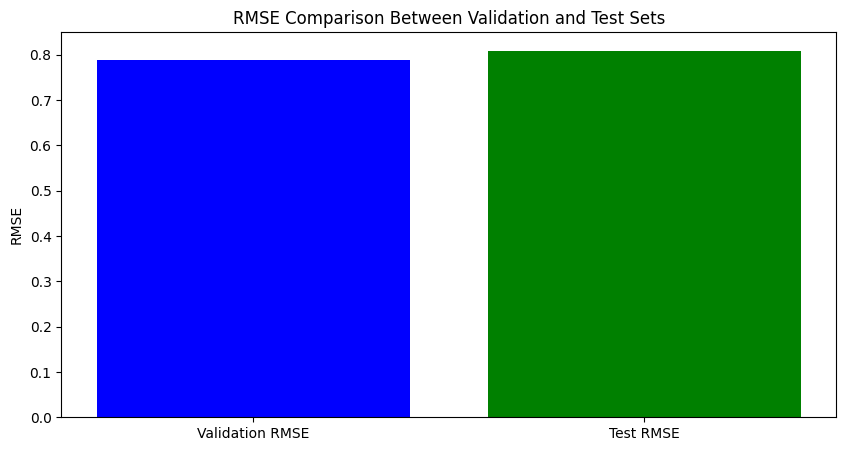

In [28]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm

# Initialize the CatBoost model with GPU support
model = CatBoostRegressor(
    iterations=100,  # Total number of iterations
    learning_rate=0.25,  # Step size shrinkage
    depth=10,  # Maximum depth of the trees
    random_seed=93,
    verbose=25,  # Set verbosity to show progress every 25 iterations
)

# Define the validation set
eval_set = Pool(X_val_combined, y_val)

# Fit the model with validation monitoring
model.fit(X_train_combined, y_train, eval_set=eval_set)

# Get the evaluation results
evals_result = model.get_evals_result()

# Predict and evaluate on the validation set
y_val_pred = model.predict(X_val_combined)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mse_val ** 0.5  # Calculate RMSE for validation set

# Predict and evaluate on the test set
y_test_pred = model.predict(X_test_combined)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5  # Calculate RMSE for test set

# Print RMSE values
print(f"Validation RMSE: {rmse_val}")
print(f"Test RMSE: {rmse_test}")

# Plot RMSE values
plt.figure(figsize=(10, 5))
plt.bar(['Validation RMSE', 'Test RMSE'], [rmse_val, rmse_test], color=['blue', 'green'])
plt.title('RMSE Comparison Between Validation and Test Sets')
plt.ylabel('RMSE')
plt.show()


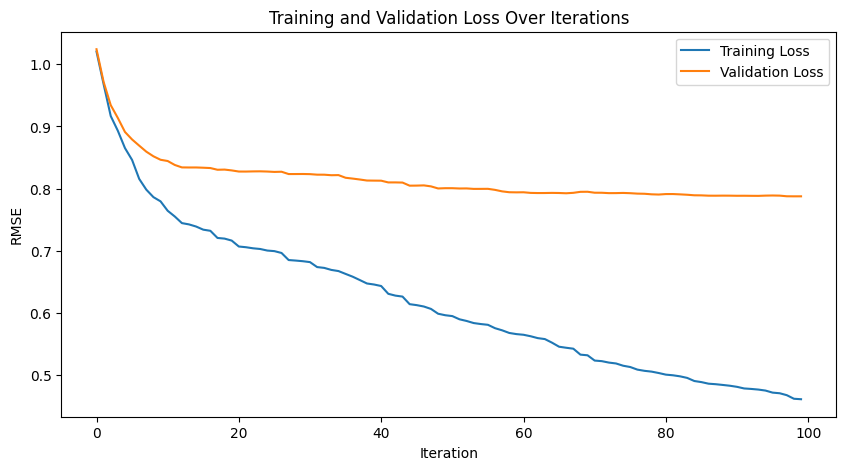

In [29]:
from catboost import CatBoostRegressor, Pool


# Define the validation set
eval_set = Pool(X_val_combined, y_val)


evals_result = model.get_evals_result()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(evals_result['learn']['RMSE'], label='Training Loss')
plt.plot(evals_result['validation']['RMSE'], label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training and Validation Loss Over Iterations')
plt.legend()
plt.show()

In [30]:
# # Evaluate the model
# test_loss = model.evaluate(X_test_list, y_test, verbose=1)
# print(f"Test Loss: {test_loss}")


**Test**

**Accuracy Calculation Based on Proximity with Tolerance of 0.6**

In [31]:
# Calculate accuracy where predictions are within 0.6 of the true values
accuracy = np.mean(abs(y_test - y_test_pred.flatten()) <= 0.6)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


**Accuracy Calculation by Rounding to the Closest Integer Value**

In [32]:
# Round the Y_test and predictions to the nearest integer
y_test_rounded = y_test.round().astype(int)
predictions_rounded = np.round(y_test_pred).astype(int)


# Calculate accuracy
print("Accuracy:",metrics.accuracy_score(y_test_rounded, predictions_rounded))

Accuracy: 0.4867444326617179


**Interfrence**

In [33]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer


# Default mean vectors for unseen values
def get_default_embedding_vector(embedding_dim):
    return np.zeros(embedding_dim)

def get_default_tfidf_vector(tfidf_dim):
    return np.zeros(tfidf_dim)

# Mean embedding and TF-IDF vectors (for unseen values)
embedding_dim = 50  # Adjust based on your embedding layer size
num_title_words = len(tokenizer_title.word_index) + 1
num_genre_words = len(tokenizer_genres.word_index) + 1
tfidf_title_dim = 4564  # Ensure this matches your TF-IDF vectorizer's max_features
tfidf_keywords_dim = 4564  # Ensure this matches your TF-IDF vectorizer's max_features

mean_title_embedding = get_default_embedding_vector(embedding_dim)
mean_genre_embedding = get_default_embedding_vector(embedding_dim)
mean_title_tfidf = get_default_tfidf_vector(tfidf_title_dim)
mean_keywords_tfidf = get_default_tfidf_vector(tfidf_keywords_dim)

# Preprocess raw data
def preprocess_raw_data(raw_data):
    # Convert '|' separated genres and plot_keywords to space-separated strings
    raw_data['genres'] = ' '.join(raw_data['genres'].split('|'))
    raw_data['plot_keywords'] = ' '.join(raw_data['plot_keywords'].split('|'))

    # Encode categorical features
    director_encoded = label_encoders['director_name'].transform([raw_data['director_name']])[0] if raw_data['director_name'] in label_encoders['director_name'].classes_ else 0
    actor1_encoded = label_encoders['actor_1_name'].transform([raw_data['actor_1_name']])[0] if raw_data['actor_1_name'] in label_encoders['actor_1_name'].classes_ else 0
    actor2_encoded = label_encoders['actor_2_name'].transform([raw_data['actor_2_name']])[0] if raw_data['actor_2_name'] in label_encoders['actor_2_name'].classes_ else 0
    actor3_encoded = label_encoders['actor_3_name'].transform([raw_data['actor_3_name']])[0] if raw_data['actor_3_name'] in label_encoders['actor_3_name'].classes_ else 0

    # Tokenize and pad text features
    title_sequence = tokenizer_title.texts_to_sequences([raw_data['movie_title']])
    padded_title = pad_sequences(title_sequence, maxlen=10)  # Adjust maxlen based on title length

    genres_sequence = tokenizer_genres.texts_to_sequences([raw_data['genres']])
    padded_genres = pad_sequences(genres_sequence, maxlen=5)  # Adjust maxlen based on genre count

    # TF-IDF
    title_tfidf = tfidf_vectorizer_title.transform([raw_data['movie_title']]).toarray()
    keywords_tfidf = tfidf_vectorizer_keywords.transform([raw_data['plot_keywords']]).toarray()

    # Standardize numeric features
    numeric_features = np.array([raw_data['duration'], raw_data['num_voted_users'],
                                 raw_data['cast_total_facebook_likes'], raw_data['budget'],
                                 raw_data['title_year'], raw_data['aspect_ratio'],
                                 raw_data['critic_review_ratio']])
    standardized_numeric_features = scaler.transform([numeric_features])

    return {
        'director_name': np.array([director_encoded]),
        'actor_1_name': np.array([actor1_encoded]),
        'actor_2_name': np.array([actor2_encoded]),
        'actor_3_name': np.array([actor3_encoded]),
        'movie_title': padded_title,
        'genres': padded_genres,
        'title_tfidf': title_tfidf,  # Ensure correct shape
        'keywords_tfidf': keywords_tfidf,  # Ensure correct shape
        'numeric_features': standardized_numeric_features
    }

# Example raw data
raw_data = {
    'director_name': 'Kelsey Mann',
    'actor_1_name': 'Amy Poehler',
    'actor_2_name': 'Maya Hawke',
    'actor_3_name': 'Kensington Tallman',
    'movie_title': 'Inside Out 2',
    'plot_keywords': 'aniamtion|teen comedy|adventure|family|quest',
    'genres': 'Action|Adventure|animation',
    'duration': 96,
    'num_voted_users': 515,
    'cast_total_facebook_likes': 15000,
    'budget': 200000000,
    'title_year': 2024,
    'aspect_ratio': 2.35,
    'critic_review_ratio': 0.9,
    'country_USA': 1,
    'country_other': 0,
    'content_rating_G': 0,
    'content_rating_GP': 0,
    'content_rating_M': 0,
    'content_rating_NC-17': 0,
    'content_rating_Not Rated': 0,
    'content_rating_PG': 0,
    'content_rating_PG-13': 1,
    'content_rating_Passed': 0,
    'content_rating_R': 0,
    'content_rating_TV-14': 0,
    'content_rating_TV-G': 0,
    'content_rating_TV-PG': 0,
    'content_rating_Unrated': 0,
    'content_rating_X': 0
}

# Process the raw data
processed_data = preprocess_raw_data(raw_data)

# Prepare input data for the model
input_data = [
    processed_data['director_name'],
    processed_data['actor_1_name'],
    processed_data['actor_2_name'],
    processed_data['actor_3_name'],
    processed_data['movie_title'],
    processed_data['genres'],
    processed_data['title_tfidf'],
    processed_data['keywords_tfidf'],
    processed_data['numeric_features']
]

# Make prediction
predicted_score = model.predict(input_data)
print(f"Predicted IMDb Score: {predicted_score[0][0]}")
print("True IMDb Score: 7.7")


ModuleNotFoundError: No module named 'keras.preprocessing.text'

////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
"""
# models can be used #
'Logistic  Reports\n',
KNN Reports\n'
'SVC Reports\n',
'Naive BayesReports\n'
'Decision Tree Reports\n'
'Ada Boosting\n'
'Random Forests Reports\n'
'Bagging Clasifier'
'Gradient Boosting'
'XGBoosting\n'
"""